In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

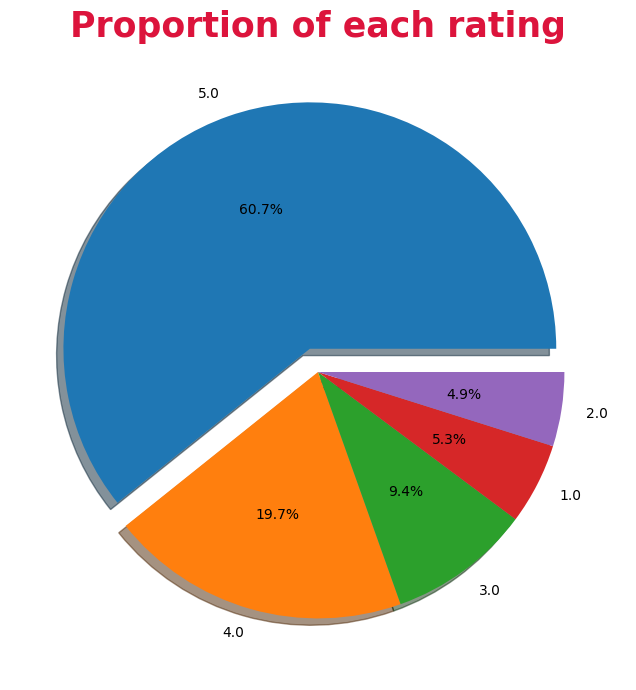

In [ ]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [ ]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [ ]:
df.shape

(40432, 4)

In [ ]:
df['text_'] = df['text_'].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [ ]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [ ]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [ ]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [ ]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [ ]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [ ]:
df['text_'] = df['text_'].str.lower()

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['text_'].head()

In [ ]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [ ]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


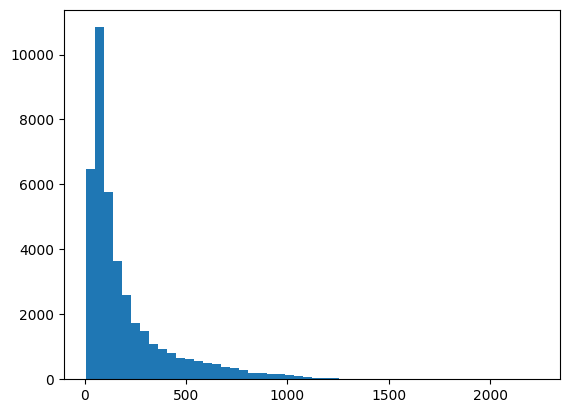

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

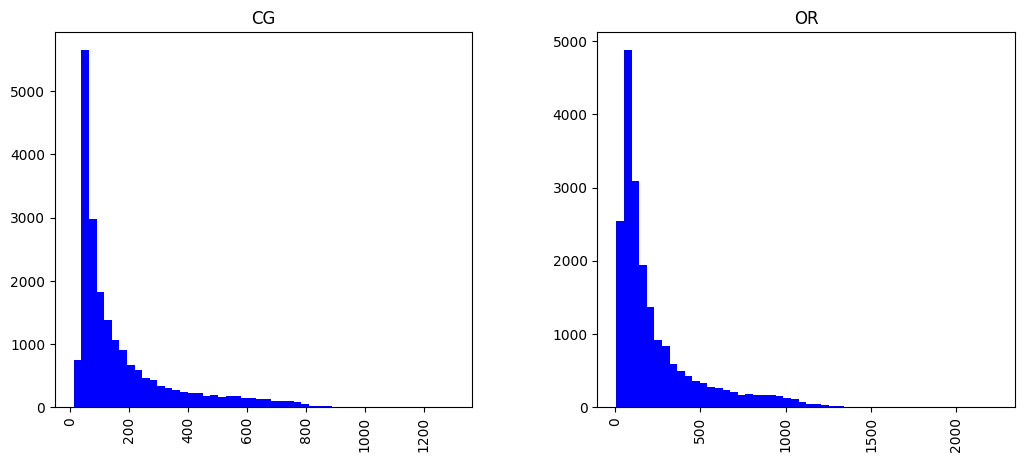

In [ ]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [ ]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [ ]:
df.length.describe()

count    40431.000000
mean       205.824219
std        219.501587
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [ ]:
texts = df['text_'].astype(str).values
labels = df['label'].values

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [ ]:

vocab_size = 1000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

print("Example original text:", texts[0])
print("Tokenized sequence:", sequences[0])
print("Padded sequence:", padded_sequences[0])


Example original text: love well made sturdi comfort i love veri pretti
Tokenized sequence: [5, 16, 51, 154, 71, 2, 5, 113, 109]
Padded sequence: [  5  16  51 154  71   2   5 113 109   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_categorical, test_size=0.2, random_state=42)


In [ ]:

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(3, activation='relu'),
    Dense(labels_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=20, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/5
1294/1294 [==============================] - 8s 6ms/step - loss: 0.1197 - accuracy: 0.9532 - val_loss: 0.2576 - val_accuracy: 0.9110
Epoch 2/5
1294/1294 [==============================] - 16s 12ms/step - loss: 0.0689 - accuracy: 0.9744 - val_loss: 0.2851 - val_accuracy: 0.9133
Epoch 3/5
1294/1294 [==============================] - 15s 11ms/step - loss: 0.0514 - accuracy: 0.9808 - val_loss: 0.3316 - val_accuracy: 0.9086
Epoch 4/5
1294/1294 [==============================] - 16s 12ms/step - loss: 0.0382 - accuracy: 0.9863 - val_loss: 0.3627 - val_accuracy: 0.9086
Epoch 5/5
253/253 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.9013
Test Accuracy: 0.90


In [ ]:
def create_model1(params):
    num_layers = int(params[0])
    num_neurons = int(params[1])
    batch_size = int(params[2])
    learning_rate = float(params[3])

    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=64, input_length=100))
    model.add(Flatten())

    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(0.5))

    model.add(Dense(labels_categorical.shape[1], activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=batch_size,
              validation_split=0.2, verbose=0, callbacks=[early_stop])

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return -accuracy  # Minimize negative accura

In [ ]:
def fitness_function(position):
    return create_model1(position)

# Initialize population
def initialize_population(pop_size, dim, lower_bounds, upper_bounds):
    return np.random.uniform(lower_bounds, upper_bounds, (pop_size, dim))

# Evaluate population
def evaluate_population(population):
    return np.array([fitness_function(ind) for ind in population])


In [ ]:
def update_position(position, alpha, beta, delta, a, dim, lower_bounds, upper_bounds):
    A1 = 2 * a * np.random.rand(dim) - a
    C1 = 2 * np.random.rand(dim)
    D_alpha = np.abs(C1 * alpha - position)
    X1 = alpha - A1 * D_alpha

    A2 = 2 * a * np.random.rand(dim) - a
    C2 = 2 * np.random.rand(dim)
    D_beta = np.abs(C2 * beta - position)
    X2 = beta - A2 * D_beta

    A3 = 2 * a * np.random.rand(dim) - a
    C3 = 2 * np.random.rand(dim)
    D_delta = np.abs(C3 * delta - position)
    X3 = delta - A3 * D_delta

    new_position = (X1 + X2 + X3) / 3
    return np.clip(new_position, lower_bounds, upper_bounds)

In [ ]:
def grey_wolf_optimizer(epochs, pop_size, dim, lower_bounds, upper_bounds):
    population = initialize_population(pop_size, dim, lower_bounds, upper_bounds)
    fitness = evaluate_population(population)

    alpha, beta, delta = None, None, None
    alpha_score, beta_score, delta_score = np.inf, np.inf, np.inf

    for iter in range(epochs):
        for i in range(pop_size):
            if fitness[i] < alpha_score:
                delta_score, delta = beta_score, beta
                beta_score, beta = alpha_score, alpha
                alpha_score, alpha = fitness[i], population[i]
            elif fitness[i] < beta_score:
                delta_score, delta = beta_score, beta
                beta_score, beta = fitness[i], population[i]
            elif fitness[i] < delta_score:
                delta_score, delta = fitness[i], population[i]

        a = 2 - iter * (2 / epochs)
        for i in range(pop_size):
            population[i] = update_position(population[i], alpha, beta, delta, a, dim, lower_bounds, upper_bounds)
        fitness = evaluate_population(population)
        print(f"Iteration {iter+1}: Best Accuracy = {-alpha_score:.4f}")

    return alpha, -alpha_score

In [ ]:

lower_bounds = np.array([1, 10, 16, 0.0001])  # [layers, neurons, batch size, lr]
upper_bounds = np.array([10, 128, 128, 0.01])
dim = 4
pop_size = 20
epochs = 10

# Run GWO
best_position, best_accuracy = grey_wolf_optimizer(epochs, pop_size, dim, lower_bounds, upper_bounds)

# Show results
print("\nBest Hyperparameters Found:")
print(f'Optimal number of layers: {int(best_position[0])}')
print(f'Optimal number of neurons: {int(best_position[1])}')
print(f'Optimal batch size: {int(best_position[2])}')
print(f'Optimal learning rate: {best_position[3]:.5f}')
print(f'Best accuracy: {best_accuracy:.4f}')


Iteration 1: Best Accuracy = 0.9217
Iteration 2: Best Accuracy = 0.9243
Iteration 3: Best Accuracy = 0.9267
Iteration 4: Best Accuracy = 0.9267
Iteration 5: Best Accuracy = 0.9267
Iteration 6: Best Accuracy = 0.9267
Iteration 7: Best Accuracy = 0.9267
Iteration 8: Best Accuracy = 0.9267
Iteration 9: Best Accuracy = 0.9267
Iteration 10: Best Accuracy = 0.9267

Best Hyperparameters Found:
Optimal number of layers: 1
Optimal number of neurons: 59
Optimal batch size: 40
Optimal learning rate: 0.00196
Best accuracy: 0.9267
